In [74]:
import os

# Set the environment variable to avoid memory leak
os.environ['OMP_NUM_THREADS'] = '1'

# Q.1

In [26]:
import pandas as pd

# Load dataset
data = pd.read_csv("ingredient.csv")

# Check table
data.head(10)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
5,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
7,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
9,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00


In [29]:
# Identify columns containing 0.00 values that need imputation
columns_with_zeros = [col for col in data.columns if (data[col] == 0.00).any()]

# Imputation calculation
for col in columns_with_zeros:
    if data[col].dtype in ['float64', 'int64']:
        non_zero_values = data[col][data[col] != 0.00]
        mean_non_zero = non_zero_values.mean()
        data[col] = data[col].replace(0.00, mean_non_zero)
# Check after being imputation
data.head(10)

,a,b,c,d,e,f,g,h,i,Cluster
0,1.51735,13.02,3.540000,1.69,72.73,0.54,8.44,0.985789,0.070000,0
1,1.53125,10.73,3.340058,2.10,69.81,0.58,13.30,3.150000,0.280000,3
2,1.52300,13.31,3.580000,0.82,71.99,0.12,10.17,0.985789,0.030000,1
3,1.51768,12.56,3.520000,1.43,73.15,0.57,8.54,0.985789,0.174286,0
4,1.51813,13.43,3.980000,1.18,72.49,0.58,8.15,0.985789,0.174286,0
5,1.51721,12.87,3.480000,1.33,73.04,0.56,8.43,0.985789,0.174286,0
6,1.51596,12.79,3.610000,1.62,72.97,0.64,8.07,0.985789,0.260000,0
7,1.51316,13.02,3.340058,3.04,70.48,6.21,6.96,0.985789,0.174286,4
8,1.51747,12.84,3.500000,1.14,73.27,0.56,8.55,0.985789,0.174286,0
9,1.52121,14.03,3.760000,0.58,71.79,0.11,9.65,0.985789,0.174286,1


## 1.(a)

In [77]:
from scipy.stats import shapiro, pearsonr, spearmanr, f_oneway

# Descriptive statistics
descriptive_stats = data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Parametric/Non-parametric analysis
normality_tests = data.apply(lambda x: shapiro(x.dropna())[1])
parametric_columns = data.columns[normality_tests > 0.05]
non_parametric_columns = data.columns[normality_tests <= 0.05]

# Correlation analysis
correlation_matrix = data.corr(method='pearson')  # Change method for Spearman's rank correlation

# ANOVA
anova_results = f_oneway(*[data[col] for col in data.columns])

print("\nParametric Columns:", parametric_columns)
print("Non-Parametric Columns:", non_parametric_columns)
print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nANOVA Results:")
print(anova_results)

Descriptive Statistics:
                a           b           c           d           e           f  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    3.340058    1.444907   72.650935    0.578098   
std      0.003037    0.816604    0.559016    0.499270    0.774546    0.620389   
min      1.511150   10.730000    0.330000    0.290000   69.810000    0.020000   
25%      1.516522   12.907500    3.340058    1.190000   72.280000    0.472500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.578098   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

                g           h           i  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.985789    0.174286  
std      1.423153    0.323485    0.052698  
min      5.430000    0.060000    0.010000  
25%      8.240000    0.985

## 1.(b)

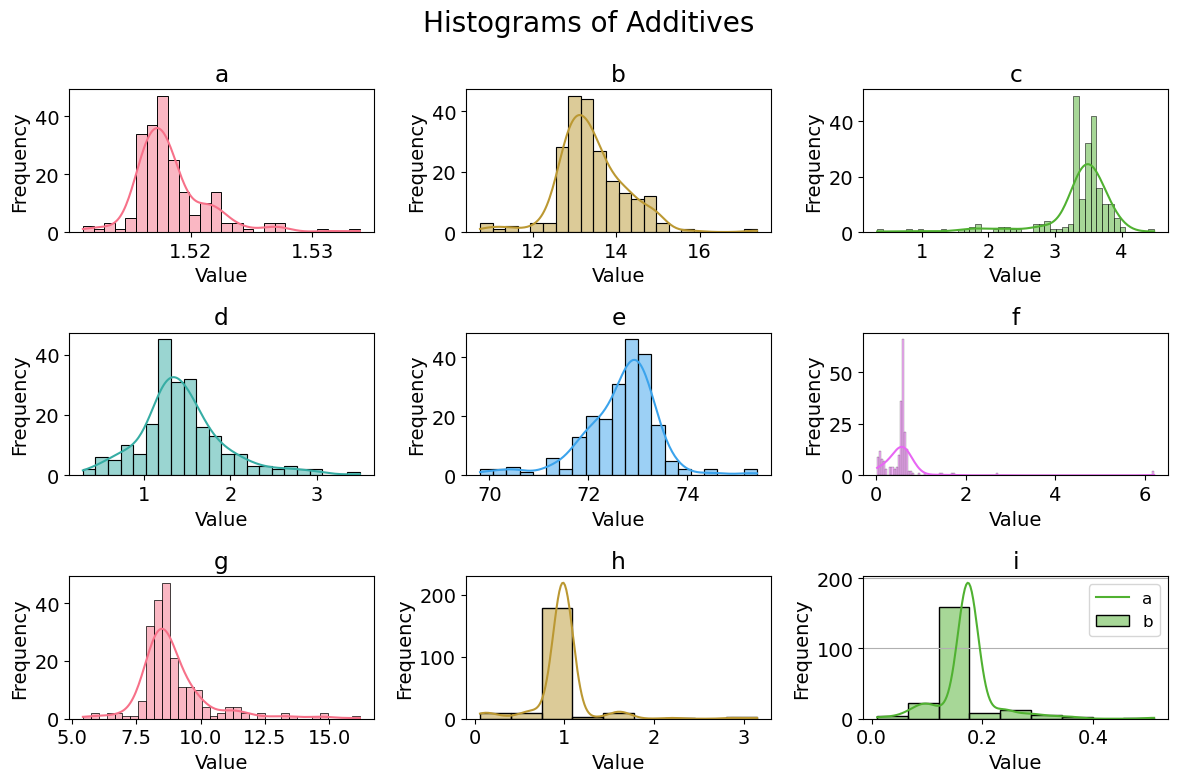

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each additive
plt.figure(figsize=(12, 8))
for column in data.columns:
    plt.subplot(3, 3, list(data.columns).index(column) + 1)
    sns.histplot(data[column], kde=True, color=sns.color_palette("husl")[list(data.columns).index(column) % len(sns.color_palette("husl"))])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.suptitle('Histograms of Additives', fontsize=20)
plt.legend(data.columns, loc='upper right')
plt.grid(axis='y')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams.update({'legend.fontsize': 12})
plt.tight_layout()
plt.show()

## 1.(c)

C:\Users\krise\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krise\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\krise\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krise\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

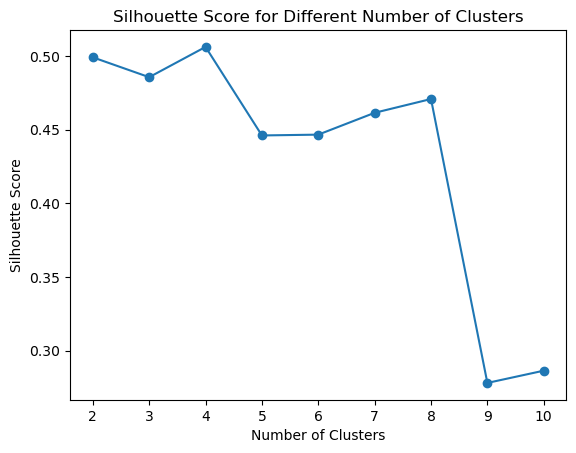

Optimal Number of Clusters: 7


C:\Users\krise\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krise\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Formulations per Cluster:
0    130
4     26
3     26
1     14
2     12
6      4
5      2
Name: Cluster, dtype: int64


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Choose the optimal number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores to determine the optimal number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')
plt.show()

# Based on the silhouette score, choosing the optimal number of clusters
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 5
print("Optimal Number of Clusters:", optimal_n_clusters)

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data)

# Add cluster labels to the dataset
data['Cluster'] = cluster_labels

# Result
print("Formulations per Cluster:")
print(data['Cluster'].value_counts())


# Q.2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
data_2 = pd.read_csv('palm_ffb.csv')

In [24]:
# Check table
data_2.head(10)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,2008-02-01,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,2008-03-01,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,2008-04-01,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,2008-05-01,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
5,2008-06-01,532.5,27.116667,21.4,35.5,182.3,24,829817.5676,1.48
6,2008-07-01,544.7,27.035484,21.2,33.9,201.6,26,814475.3012,1.66
7,2008-08-01,569.9,27.200000,21.7,34.5,283.2,26,782279.5322,1.71
8,2008-09-01,571.7,27.556667,21.2,35.1,176.3,25,795237.6543,1.62
9,2008-10-01,565.3,27.358065,22.1,33.9,217.5,24,765090.8602,1.86


In [4]:
# Check missing values
print(data_2.isnull().sum())

# Convert 'Date' column to datetime format
data_2['Date'] = pd.to_datetime(data_2['Date'], format='%d.%m.%Y')

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64


In [5]:
import statsmodels.api as sm

X = data_2[['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Working_days', 'HA_Harvested']]
y = data_2['FFB_Yield']

# Add constant term to the feature matrix
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Result
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              FFB_Yield   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     5.935
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           5.92e-06
Time:                        02:21:58   Log-Likelihood:               -0.23443
No. Observations:                 130   AIC:                             16.47
Df Residuals:                     122   BIC:                             39.41
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7331      1.520      1.798

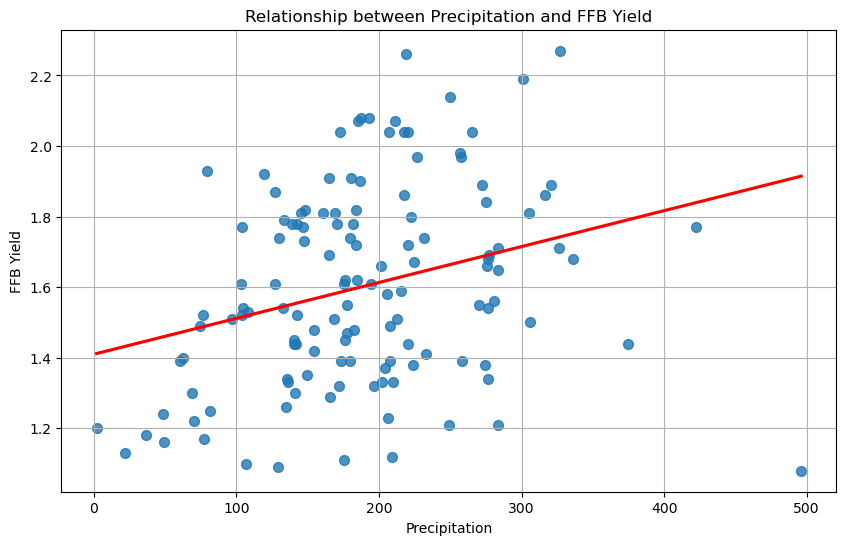

In [15]:
# Scatter plot with regression line for Precipitation vs. FFB Yield
plt.figure(figsize=(10, 6))
sns.regplot(x='Precipitation', y='FFB_Yield', data=data_2, scatter_kws={'s': 50}, ci=None, line_kws={'color': 'red'})
plt.title('Relationship between Precipitation and FFB Yield')
plt.xlabel('Precipitation')
plt.ylabel('FFB Yield')
plt.grid(True)
plt.show()

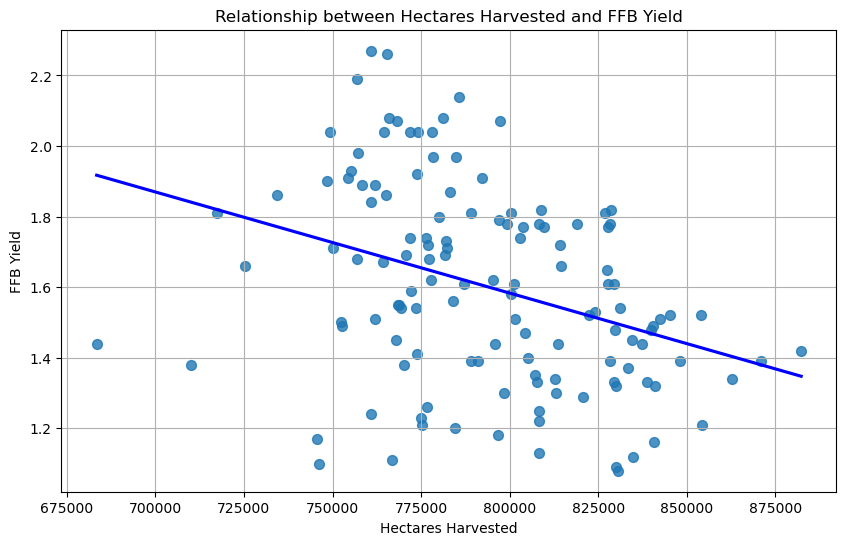

In [14]:
# Scatter plot with regression line for Hectares Harvested vs. FFB Yield
plt.figure(figsize=(10, 6))
sns.regplot(x='HA_Harvested', y='FFB_Yield', data=data_2, scatter_kws={'s': 50}, ci=None, line_kws={'color': 'blue'})
plt.title('Relationship between Hectares Harvested and FFB Yield')
plt.xlabel('Hectares Harvested')
plt.ylabel('FFB Yield')
plt.grid(True)
plt.show()

# Q.3
## 3.(a)

In [ ]:
nltk.download('punkt')

In [22]:
import nltk
from nltk.tokenize import word_tokenize

# Context
paragraph = """
As a term, data analytics predominantly refers to an assortment of applications, from basic business 
intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced 
analytics. In that sense, it's similar in nature to business analytics, another umbrella term for 
approaches to analyzing data -- with the difference that the latter is oriented to business uses, while 
data analytics has a broader focus. The expansive view of the term isn't universal, though: In some 
cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate 
category. Data analytics initiatives can help businesses increase revenues, improve operational 
efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to 
emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of 
boosting business performance. Depending on the particular application, the data that's analyzed 
can consist of either historical records or new information that has been processed for real-time 
analytics uses. In addition, it can come from a mix of internal systems and external data sources. At 
a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find 
patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical 
techniques to determine whether hypotheses about a data set are true or false. EDA is often 
compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a 
distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data 
analytics can also be separated into quantitative data analysis and qualitative data analysis. The 
former involves analysis of numerical data with quantifiable variables that can be compared or 
measured statistically. The qualitative approach is more interpretive -- it focuses on understanding 
the content of non-numerical data like text, images, audio and video, including common phrases, 
themes and points of view.
"""

# Define function to calculate distinct word counts
def calculate_data_probability(sentences):
    data_probabilities = []
    
    # Loop through each sentence
    for sentence in sentences:
        words = word_tokenize(sentence)
        data_count = words.count("data")
        total_words = len(words)

        if total_words != 0:
            data_prob = data_count / total_words
        else:
            data_prob = 0

        data_probabilities.append(data_prob)

    return data_probabilities

# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)

# Calculate word probabilities
data_probabilities = calculate_data_probability(sentences)

# Results
for i, prob in enumerate(data_probabilities):
    print(f"Probability of 'data' occurring in line {i+1}: {prob:.4f}")

Probability of 'data' occurring in line 1: 0.0270
Probability of 'data' occurring in line 2: 0.0476
Probability of 'data' occurring in line 3: 0.0303
Probability of 'data' occurring in line 4: 0.0000
Probability of 'data' occurring in line 5: 0.0345
Probability of 'data' occurring in line 6: 0.0588
Probability of 'data' occurring in line 7: 0.0980
Probability of 'data' occurring in line 8: 0.0000
Probability of 'data' occurring in line 9: 0.1333
Probability of 'data' occurring in line 10: 0.0556
Probability of 'data' occurring in line 11: 0.0286


## 3.(b)

In [20]:
# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)

# Define function to calculate distinct word counts
def calculate_distinct_word_counts(sentences):
    distinct_word_counts = []

    # Loop through each sentence
    for sentence in sentences:
        words = word_tokenize(sentence)
        distinct_word_counts.append(len(set(words)))
    return distinct_word_counts

# Calculate distinct word counts
distinct_word_counts = calculate_distinct_word_counts(sentences)

# Results
print("Distribution of distinct word counts across all lines:", distinct_word_counts)


Distribution of distinct word counts across all lines: [30, 33, 30, 43, 27, 17, 37, 37, 13, 18, 30]


## 3.(c)

In [23]:
# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)

# Define function to calculate probability of "analytics" occurring after "data"
def calculate_analytics_after_data_probability(sentences):
    data_count = 0
    analytics_after_data_count = 0

    # Loop through each sentence
    for sentence in sentences:
        words = word_tokenize(sentence)
        
        # Check for occurrence of "analytics" after "data"
        if "data" in words:
            data_index = words.index("data")
            if data_index < len(words) - 1 and words[data_index + 1] == "analytics":
                analytics_after_data_count += 1
            data_count += 1

    # Calculate probability of "analytics" occurring after "data"
    if data_count != 0:
        analytics_after_data_prob = analytics_after_data_count / data_count
    else:
        analytics_after_data_prob = 0

    return analytics_after_data_prob

# Calculate probability of "analytics" occurring after "data"
analytics_after_data_prob = calculate_analytics_after_data_probability(sentences)

# Result
print("Probability of 'analytics' occurring after 'data':", analytics_after_data_prob)


Probability of 'analytics' occurring after 'data': 0.3333333333333333
